# 제 9회 엔지니어링 산업 설계대전  
저희 Dable은 이번 엔지니어링 산업 설계대전에 있어, 취업정보사이트에 있는 기업정보들을 웹스크래핑을 통해 불러와 기업과 연봉, 평점, 면접 난이도 등의 다양한 컬럼들에 대한 상관성 분석과 이를 시각화툴을 이용한 대시보드 생성, 그리고 본인의 자격 요건에 맞게 마감시한이 급한 순서대로 기업 공고를 확인할 수 있는 GUI인터페이스를 생성하였습니다.

## 기능소개)  
1 - 대시보드를 통한 기업 분석  
2 - 본인이 관심있는 기업의 요소들과 연봉의 상관관계 분석  
3 - 본인의 자격요건(학력, 경력)에 따른 지원가능한 기업공고 파악

### 1. 웹스크래핑(잡플래닛)

In [ ]:
import csv
import requests 
from bs4 import BeautifulSoup
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36"}


url = "https://www.jobplanet.co.kr/companies?sort_by=review_avg_cache&industry_id=200"
res = requests.get(url, headers=headers) 
res.raise_for_status()
soup = BeautifulSoup(res.text, "lxml")

data_rows = soup.find("div",attrs={"class":"section_group"}).find_all("section")
for row in data_rows:
    columns= row.find_all("div")
    # if "\n" in columns and '' in columns:
    #     continue
    data = [column.get_text().strip() for column in columns]
    print(data)

In [1]:
# 각 분야에 대한 상위 50개의 기업들을 스크래핑한 한후 csv로 변환한 파일을 불러왔습니다.
import pandas as pd
it = pd.read_csv("it분야1.csv",encoding='cp949')
organ = pd.read_csv("기관협회분야.csv",encoding='cp949')
media = pd.read_csv("미디어디자인분야.csv",encoding='cp949')
distribute = pd.read_csv("유통무역분야.csv",encoding='cp949')
chemical = pd.read_csv("제조화학.csv",encoding='cp949')
alldata = pd.read_csv("50개데이터1.csv", encoding = 'cp949')


In [2]:
# 각 기업에 대해 총 9개의 변수들을 불러온 모습입니다.
it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     50 non-null     object 
 1   사업분야    50 non-null     object 
 2   지역      50 non-null     object 
 3   위도      49 non-null     float64
 4   경도      49 non-null     float64
 5   평점      50 non-null     float64
 6   연봉      50 non-null     int64  
 7   직원수     50 non-null     int64  
 8   기업형태    50 non-null     object 
 9   면접난이도   50 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.0+ KB


In [47]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     242 non-null    object 
 1   사업분야    242 non-null    object 
 2   지역      242 non-null    object 
 3   평점      242 non-null    float64
 4   연봉      242 non-null    int64  
 5   직원수     242 non-null    int64  
 6   기업형태    242 non-null    object 
 7   면접난이도   242 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.2+ KB


In [48]:
it.head()

,회사명,사업분야,지역,위도,경도,평점,연봉,직원수,기업형태,면접난이도
0,(주)셀메이트,IT/웹/통신,서울,37.566535,126.977969,4.6,3025,49,중소기업,2.8
1,페이스북코리아(유),IT/웹/통신,서울,37.566535,126.977969,4.6,14001,81,외국계,3.6
2,(주)센드버드코리아,IT/웹/통신,서울,37.566535,126.977969,4.4,4642,250,중소기업,3.1
3,라이엇게임즈코리아,IT/웹/통신,해외,NaN,NaN,4.4,6337,121,외국계,3.7
4,유니티테크놀로지스코리아(유),IT/웹/통신,서울,37.566535,126.977969,4.4,5128,3846,외국계,3.2


In [49]:
it.isnull()

,회사명,사업분야,지역,위도,경도,평점,연봉,직원수,기업형태,면접난이도
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [31]:
it.isna().sum()

회사명      0
사업분야     0
지역       0
위도       1
경도       1
평점       0
연봉       0
직원수      0
기업형태     0
면접난이도    0
dtype: int64

In [32]:
it["지역"].fillna(0 , inplace=True)

In [33]:
it.isna().sum()

회사명      0
사업분야     0
지역       0
위도       1
경도       1
평점       0
연봉       0
직원수      0
기업형태     0
면접난이도    0
dtype: int64

In [34]:
train[["평점", "연봉"]].groupby("평점").mean().sort_values("연봉")

NameError: name 'train' is not defined

<AxesSubplot:xlabel='평점'>

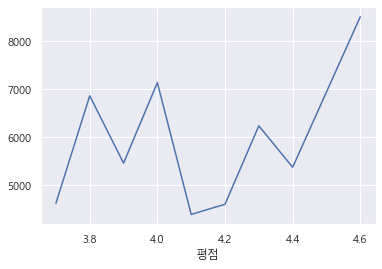

In [35]:
it.groupby('평점').mean()['연봉'].plot()

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   회사명     242 non-null    object 
 1   사업분야    242 non-null    object 
 2   지역      242 non-null    object 
 3   평점      242 non-null    float64
 4   연봉      242 non-null    int64  
 5   직원수     242 non-null    object 
 6   기업형태    242 non-null    object 
 7   면접난이도   242 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 15.2+ KB


### 1.2 각 분야에 기업들에 대해, 각 컬럼들에 대한 상관선 분석을 실시하였습니다.

<AxesSubplot:>

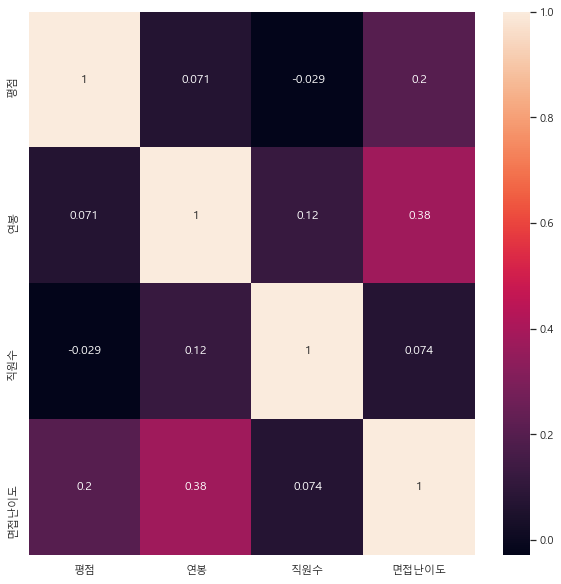

In [51]:
# 전체
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(alldata.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

<AxesSubplot:>

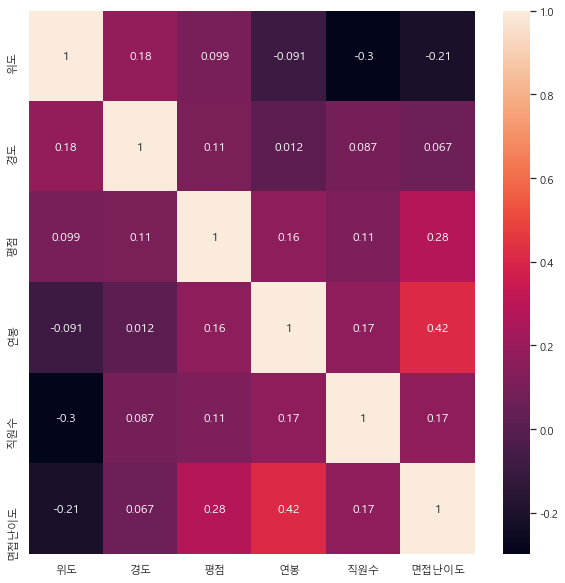

In [12]:
# IT분야
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(it.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

<AxesSubplot:>

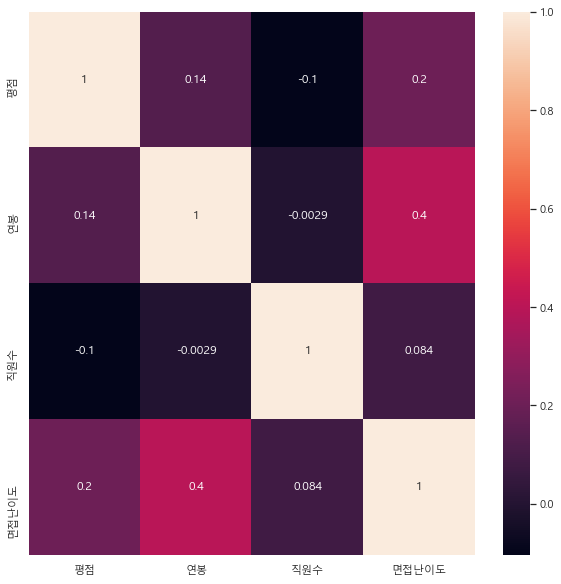

In [25]:
# 기간&협회분야
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(organ.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

<AxesSubplot:>

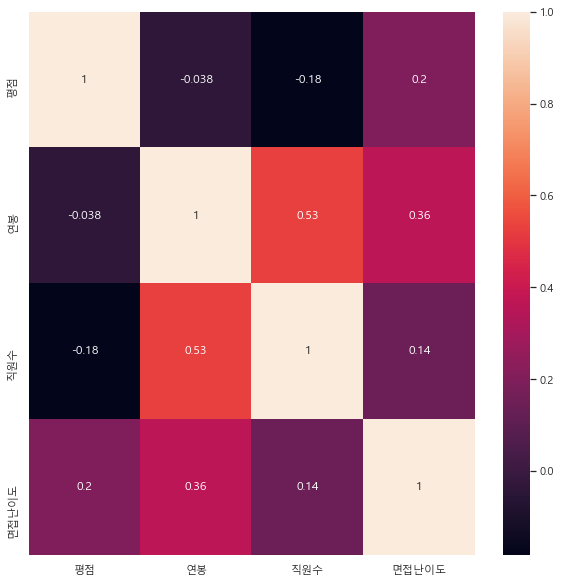

In [14]:
# 미디어디자인분야
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(media.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

<AxesSubplot:>

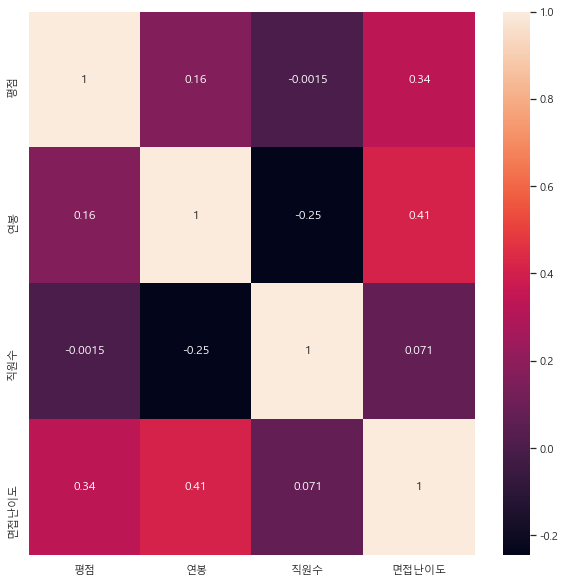

In [15]:
# 유통무역분야
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(distribute.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

<AxesSubplot:>

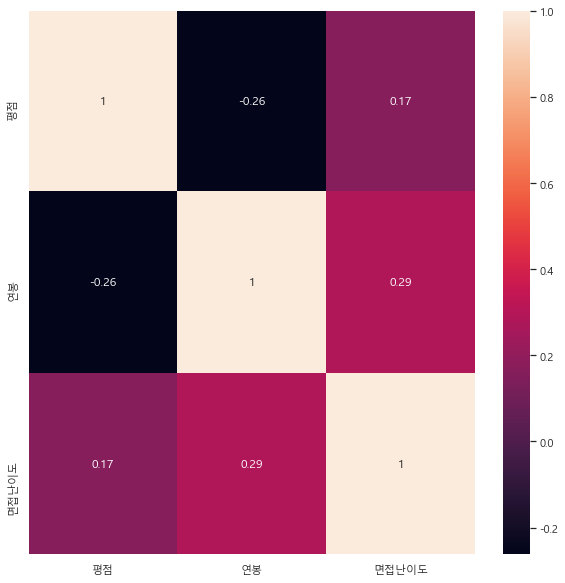

In [16]:
# 제조화학분야
sns.set(font = "Malgun Gothic",
       rc = {"axes.unicode_minus":False},
       style = "darkgrid")

plt.figure(figsize=(10,10))  #도화지 크기를 늘려 밑에 그림을 크게보게 해줌
sns.heatmap(chemical.corr(),annot=True)   #변수별의 상관계수 보기, annot =True 수치보여주기

### 1.3 이후, 이를 Power_BI를 통해 대시보드를 생성하였습니다.


### 2. 웹스크핑(잡코리아)  
추가로 마감시한이 빠른 공고들에 대해 학인하기 위해 잡플래닛 외 잡코리아에서 왭스크래핑을 실시하였습니다.

In [3]:
import csv
import requests 
import re
from bs4 import BeautifulSoup
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36"}

# filename = "잡코리아 공채 정보 데이터.csv"
# f = open(filename, "w", encoding="utf-8-sig", newline="")
# writer = csv.writer(f)
# title="회사명 채용내용 채용사이트 채용유형 학력사항 기한".split("\t")
# writer.writerow(title)

list = []
for i in range(1,21):
    url = f"https://www.jobkorea.co.kr/Starter/?JoinPossible_Stat=0&schOrderBy=0&LinkGubun=0&LinkNo=0&schType=0&schGid=0&Page={i}"
    res = requests.get(url, headers=headers) 
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "lxml")
               
    data_rows = soup.find("ul",attrs={"class":"filterList"}).find_all("li")

    for row in data_rows:
        columns1 = row.find("div", attrs = {"class":"coTit"}) #기업명
        columns2 = row.find("div", attrs = {"class": "info"}) #공고명+직무
        columns3 = row.find("div", attrs = {"class":"sDesc"}) #경력+학력
        columns4 = row.find("span", attrs = {"class":re.compile("^day")}) #마감시한
        
        data1 = [columns1.a.get_text()] #기업명
        data2 = [columns2.a.get_text().strip()] #공고명+직무
        data3 = ["https://www.jobkorea.co.kr/" + columns2.a["href"]] #링크
        data4 = [columns3.strong.get_text().strip()] #경력
        data5 = [columns3.span.get_text().strip()] #학력
        data6 = [columns4.get_text().strip()] #마감시한

        data = data1+data2+data3+data4+data5+data6

        list.append(data)
        print(data)


# DB생성
import pandas as pd
# 크롤링 결과 results 를 pandas의 DataFrame 형식으로 읽어온다.
data_df = pd.DataFrame(list)
data_df.columns = ['기업명', '공고명', '링크', '경력', '학력', '마감시한']
data_df.to_csv('data.csv', encoding='cp949') #데이터 프레임 csv로 저장해보기

#데이터 프레임 -> SQL로 변환
import sqlite3
data_DB = sqlite3.connect('data_DB.db')
data_df.to_sql('jobkorea1_20', data_DB, index = False )
data_DB.commit()

['㈜엔미디어플랫폼', '[NEXON COMPANY] NMP 채용연계형 인턴 모집 안내(기획/사업)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35013859?Oem_Code=C1&PageGbn=ST', '인턴·신입·경력', '대졸↑', '~2021.06.30(수)']
['롯데마트', '경력사원(IT운영) 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35100712?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.27(일)']
['롯데마트', '경력사원(빅데이터/온라인마케팅/IT운영) 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35100618?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.27(일)']
['㈜이마트', 'SAP MM/SD PI 및 Back-end S/W Engineer 경력사원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35100596?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.06.28(월)']
['㈜한솥', '인테리어 부문 경력사원 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35100417?Oem_Code=C1&PageGbn=ST', '경력', '초대졸↑', '~2021.07.18(일)']
['한국은행', '일반기능직원(서무) 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35099979?Oem_Code=C1&PageGbn=ST', '신입·경력', '학력무관', '~2021.06.30(수)']
['홈플러스㈜', '베이커리 7년 이상 경력직 채용 (점포근무 정규직)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35099553?

['㈜예스코이에스', '인제군 환경기초시설 기술직 채용(환경,기계,전기직)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092928?Oem_Code=C1&PageGbn=ST', '경력무관', '초대졸↑', '~2021.06.30(수)']
['㈜예스코이에스', '양구군 환경기초시설 기술직 채용(환경,기계,전기직)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092764?Oem_Code=C1&PageGbn=ST', '경력무관', '초대졸↑', '~2021.09.16(목)']
['(재)여성기업종합지원센터', '[서울언어치료임상연구소] 유튜브, 블로그, SNS 콘텐츠 제작 관리자 모집(청년디지털일자리)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092733?Oem_Code=C1&PageGbn=ST', '경력무관', '학력무관', '~2021.07.11(일)']
['㈜에이피알', '[에이피알] VMD 인턴사원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092617?Oem_Code=C1&PageGbn=ST', '인턴·경력무관', '대졸↑', '~2021.06.27(일)']
['㈜안랩', '[경력] PMO(Project Management Office) 담당자 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092615?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.06.30(수)']
['㈜국일방적', '관리본부 인사/총무팀 사원 모집합니다.', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35092549?Oem_Code=C1&PageGbn=ST', '신입', '고졸↑', '~2021.06.23(수)']
['한국국토정보공사', '상반기 전문인력 채용', 'https://www.jo

['㈜유니에스', '(주)유니에스 본사 노무전략팀 담당자 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35084575?Oem_Code=C1&PageGbn=ST', '신입·경력', '초대졸↑', '~2021.07.16(금)']
['㈜동화세상에듀코', '경리/회계 경력자 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35084271?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '채용시']
['(주)홈초이스', '영상 기획·편집·제작 부문 정규직 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35084236?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.07.01(목)']
['㈜스마일게이트', '[스마일게이트 스토브][데이터기술] NoSQL DB 엔지니어 담당', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35084188?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.09.15(수)']
['오토플러스㈜', '오토플러스(주) 각 부문별 신입/경력 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35084037?Oem_Code=C1&PageGbn=ST', '신입·경력', '학력무관', '~2021.09.15(수)']
['한국에너지기술연구원', '2021년도 제1차 신규직원 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35083912?Oem_Code=C1&PageGbn=ST', '신입·경력', '학력무관', '~2021.06.30(수)']
['광동제약', '[광동제약] 약국마케팅팀 경력직원 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35083875?Oem_Code=C1&PageGb

['㈜에듀윌', '온라인컨텐츠 기획자 및 마케터 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35076353?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.27(일)']
['현대HDS㈜', '솔루션 운영 경력직원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35076325?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.30(수)']
['현대HDS㈜', 'Framework 경력직원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35076316?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.30(수)']
['롯데캐피탈㈜', '롯데캐피탈(주) 리스금융, Auto금융 사무직원 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35076017?Oem_Code=C1&PageGbn=ST', '경력무관', '학력무관', '오늘마감']
['우리종합금융㈜', '전략기획부 ESG기획 및 전략기획 경력직 채용(과장급)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35075958?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.23(수)']
['㈜드림어스컴퍼니', 'UX/UI 디자이너 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35075919?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.09.14(화)']
['라인게임즈㈜', '[라인게임즈] 인사팀 Lead 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35075826?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '채용시']


['신일전자 ㈜', '홍보팀 ( 브랜드마케터 , 웹디자이너 ) 마케팅팀 부문 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35070384?Oem_Code=C1&PageGbn=ST', '신입·경력', '대졸↑', '~2021.07.16(금)']
['㈜하나투어', '프론트/백엔드/검색/자연어처리/QA 개발 경력자 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35070121?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.09.14(화)']
['㈜지니뮤직', '[지니뮤직] ISMS운영관리/개인정보보호 담당 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35070092?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.27(일)']
['매그나칩반도체', '[매그나칩반도체] 공정 Engineer 신입사원 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35069604?Oem_Code=C1&PageGbn=ST', '신입', '대졸↑', '~2021.06.23(수)']
['한영회계법인', '[EY한영] 경영지원본부 Brand, Marketing & Communications(BMC)팀 언론홍보 담당 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35069555?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.25(금)']
['한영회계법인', '[EY한영] 경영지원본부 Brand, Marketing & Communications(BMC)팀 경력직 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35069495?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.25(금)']
['삼양

['팅크웨어㈜', '아이나비 총무팀 신입 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060312?Oem_Code=C1&PageGbn=ST', '신입', '초대졸↑', '~2021.06.29(화)']
['한진정보통신㈜', '한진그룹 한진정보통신(주) 스타트업 발굴기획부문 경력직원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060275?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.06.30(수)']
['한화솔루션', '[큐셀] Perovskite담당 경력사원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060202?Oem_Code=C1&PageGbn=ST', '경력', '석사↑', '~2021.07.16(금)']
['한진정보통신㈜', '한진그룹 한진정보통신(주) 솔루션 기술검증 부문 경력직원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060192?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.06.30(수)']
['아미코젠㈜', '2021년 인사팀 경력/신입 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060191?Oem_Code=C1&PageGbn=ST', '신입·경력', '대졸↑', '~2021.06.27(일)']
['바른경제티브이㈜', '채용 담당자(Recruit Manager) 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35060069?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.09.13(월)']
['한진정보통신㈜', '한진그룹 한진정보통신(주) IT기획(IT제품기획) 부문 경력직원 모집', 'https://www.jobkorea.co.kr//Recruit/

['㈜직방', '[직방] 직방 파트너 인력 운영 인사 담당자 채용 (경력)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051851?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.08.13(금)']
['삼일회계법인', '[삼일회계법인] 재경본부 인턴(정규직 전환형) 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051731?Oem_Code=C1&PageGbn=ST', '인턴·신입', '대졸↑', '~2021.06.25(금)']
['신성통상㈜', '신성통상(주) 경영정보팀 신입사원 수시채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051625?Oem_Code=C1&PageGbn=ST', '신입', '대졸↑', '오늘마감']
['엔에이치엔소프트㈜', '[NHN SOFT] Test Engineer 인턴 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051585?Oem_Code=C1&PageGbn=ST', '인턴·신입', '초대졸↑', '채용시']
['㈜웨이크원엔터테인먼트', '[웨이크원ENT] 로드매니저 채용 공고', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051553?Oem_Code=C1&PageGbn=ST', '신입·경력', '학력무관', '~2021.07.14(수)']
['㈜와이낫미디어', '[와이낫미디어] 채널팀 인턴 수시채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35051236?Oem_Code=C1&PageGbn=ST', '인턴·신입', '학력무관', '~2021.06.27(일)']
['㈜나이스디앤비', '[ NICE D&B ] 기술신용평가 영업 및 기술조사직', 'https://www.jobkorea.co.kr//Recruit/GI_Read/350511

['㈜젠솔소프트', '디자인/퍼블리싱 경력직 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35046450?Oem_Code=C1&PageGbn=ST', '경력', '초대졸↑', '~2021.06.30(수)']
['팬오션㈜', '2021년 팬오션㈜ 경력직 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35046368?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.23(수)']
['현대신텍(주)', '2021년 상반기 경력사원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35046214?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.24(목)']
['㈜삼표', '2021년 6월 삼표그룹 경력직 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35045910?Oem_Code=C1&PageGbn=ST', '경력', '초대졸↑', '~2021.06.25(금)']
['푸본현대생명보험㈜', '[푸본현대생명] 정보보안팀 신입 인재 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35045872?Oem_Code=C1&PageGbn=ST', '신입', '대졸↑', '오늘마감']
['한미약품㈜', '2021년 6월 한미약품 수시채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35045751?Oem_Code=C1&PageGbn=ST', '신입·경력', '고졸↑', '~2021.06.27(일)']
['㈜하나투어', '하나투어 마케팅 / CRM 경력자 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35045618?Oem_Code=C1&PageGbn=ST', '경력', '학력무관', '~2021.06.30(수)']
[

['다스코㈜', '다스코(주) 건축자재 사업본부 경력/신입 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030778?Oem_Code=C1&PageGbn=ST', '신입·경력', '학력무관', '채용시']
['이투스교육㈜', '[이투스교육] 퍼블리싱사업본부 현장영업 신입/경력 채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030760?Oem_Code=C1&PageGbn=ST', '신입·경력', '대졸↑', '~2021.06.23(수)']
['한국투자증권㈜', '2021 채용연계형 해외대 인턴 공개채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030679?Oem_Code=C1&PageGbn=ST', '인턴·경력무관', '대졸↑', '~2021.06.24(목)']
['스탠다드차타드은행', '[정규직] 정보시스템개발/유지부 직원 채용 - FM(Financial Markets) 관련 시스템 관리 (팀장 이하)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030670?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.24(목)']
['비테스코테크놀로지스코리아㈜', '신입 및 경력직 채용 (품질/연구개발/경영지원)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030584?Oem_Code=C1&PageGbn=ST', '신입·경력', '대졸↑', '~2021.06.23(수)']
['㈜나무가', '[중견기업/상장사] 선행개발팀 HW, 광학 담당자 모집합니다', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35030573?Oem_Code=C1&PageGbn=ST', '경력무관', '초대졸↑', '~2021.06.25(금)']
['㈜다날', '다날 대외업무 담당 신입/경력사원 모집', '

['㈜SM엔터테인먼트', '2021 2분기 정기채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35023203?Oem_Code=C1&PageGbn=ST', '신입·경력', '', '~2021.06.22(화)']
['㈜NAVER', '[Search] 연구/개발 체험형 인턴십 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35022523?Oem_Code=C1&PageGbn=ST', '인턴·신입', '학력무관', '채용시']
['애경산업㈜', '2021 경력사원 공개채용', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35022433?Oem_Code=C1&PageGbn=ST', '경력', '', '~2021.06.28(월)']
['케이던스코리아(유)', 'HR Intern', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35022346?Oem_Code=C1&PageGbn=ST', '인턴·신입', '대졸↑', '~2021.09.09(목)']
['대원씨티에스㈜', '물류센터 담당사원 모집', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35022298?Oem_Code=C1&PageGbn=ST', '신입', '고졸↑', '채용시']
['㈜뉴옵틱스', '[정규직] 품질수입검사원', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35022148?Oem_Code=C1&PageGbn=ST', '경력무관', '고졸↑', '~2021.08.10(화)']
['세스코', '(주)세스코 마케팅실 그래픽디자인 경력직 모집 (5년 이상)', 'https://www.jobkorea.co.kr//Recruit/GI_Read/35021948?Oem_Code=C1&PageGbn=ST', '경력', '대졸↑', '~2021.06.27(일)']
['현대글로비스㈜', '각 부문 경

### 2.1 이후, 불러온 DB를 가지고 GUI인터페이스를 생성후 각 버튼에 함수를 생성하였습니다.

In [5]:
from tkinter import *
import sqlite3
import tkinter.ttk as ttk

# tkinter 위젯 설정
root = Tk()
root.title("구직 검색기")
width = 800
height = 400
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x = (screen_width/2) - (width/2)
y = (screen_height/2) - (height/2)
root.geometry("%dx%d+%d+%d" % (width, height, x, y))
root.resizable(0, 0)

#사용 함수 정리
def Database():
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    cur.execute("SELECT * FROM jobkorea1_20")
    if cur.fetchall() is None:
         con.commit()
        
    cur.execute("SELECT * FROM jobKorea1_20")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()
    
def Search():
    if SEARCH.get() != "":
        tree.delete(*tree.get_children())
        con = sqlite3.connect("data_DB.db")
        cur = con.cursor()
        cur.execute("SELECT * FROM jobkorea1_20 WHERE 기업명 LIKE ?  ORDER BY 마감시한", ("%" + str(SEARCH.get()) + "%",))
        fetch = cur.fetchall()
        for data in fetch:
            tree.insert('', 'end', values=(data))
        cur.close()
        con.close()
        
def Reset():
    search.delete(0,END)
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    tree.delete(*tree.get_children())
    cursor.execute("SELECT * FROM jobkorea1_20 ")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()

def NoCareer():
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    tree.delete(*tree.get_children())
    cur.execute("SELECT * FROM jobkorea1_20 WHERE 경력 LIKE '신%' or 경력 LIKE '인%' or 경력 = '경력무관' ORDER BY 마감시한")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()

def HaveCareer():
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    tree.delete(*tree.get_children())
    cur.execute("SELECT * FROM jobkorea1_20 WHERE 경력 LIKE '경%' or 경력 = '경력무관' ORDER BY 마감시한 ")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()
    

def Grade():
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    tree.delete(*tree.get_children())
    cur.execute("SELECT * FROM jobkorea1_20 WHERE (학력 LIKE '대%' or 학력 = '학력무관') ORDER BY 마감시한")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()
    
def SB():
    con = sqlite3.connect("data_DB.db")
    cur = con.cursor()
    tree.delete(*tree.get_children())
    cur.execute("SELECT * FROM jobkorea1_20 WHERE (학력 LIKE '박%' or 학력 LIKE '석%') ORDER BY 마감시한")
    fetch = cur.fetchall()
    for data in fetch:
        tree.insert('', 'end', values=(data))
    cur.close()
    con.close()

#변수
SEARCH = StringVar()

#GUI 내 설정
Top = Frame(root, width=500, bd=1, relief=SOLID)
Top.pack(side=TOP)
TopFrame = Frame(root, width=500)
TopFrame.pack(side=TOP)
TopForm= Frame(TopFrame, width=300)
TopForm.pack(side=LEFT, pady=10)
TopMargin = Frame(TopFrame, width=260)
TopMargin.pack(side=LEFT)
MidFrame = Frame(root, width=500)
MidFrame.pack(side=TOP)

#레이블 설정
lbl_title = Label(Top, width=500, font=('arial', 18), text="잡코리아 구직 검색기")
lbl_title.pack(side=TOP, fill=X)

#입력창 설정
search = Entry(TopForm, textvariable=SEARCH)
search.pack(side=LEFT)

#버튼 설정
btn_search = Button(TopForm, text="Search", bg="#006dcc", command=Search)
btn_search.pack(side=LEFT)
btn_reset = Button(TopForm, text="Reset", command=Reset)
btn_reset.pack(side=LEFT)
btn_reset = Button(TopForm, text="신입", command=NoCareer)
btn_reset.pack(side=RIGHT)
btn_reset = Button(TopForm, text="경력", command=HaveCareer)
btn_reset.pack(side=RIGHT)
btn_reset = Button(TopForm, text="석·박사", command=SB)
btn_reset.pack(side=RIGHT)
btn_reset = Button(TopForm, text="대졸", command=Grade)
btn_reset.pack(side=RIGHT)


#테이블 내 설정
scrollbarx = Scrollbar(MidFrame, orient=HORIZONTAL)
scrollbary = Scrollbar(MidFrame, orient=VERTICAL)
tree = ttk.Treeview(MidFrame, columns=("기업명", "공고명", "링크", "경력", "학력", "마감기한"), selectmode="extended", height=400, yscrollcommand=scrollbary.set, xscrollcommand=scrollbarx.set)
scrollbary.config(command=tree.yview)
scrollbary.pack(side=RIGHT, fill=Y)
scrollbarx.config(command=tree.xview)
scrollbarx.pack(side=BOTTOM, fill=X)
tree.heading('기업명', text="기업명",anchor=W)
tree.heading('공고명', text="공고명",anchor=W)
tree.heading('링크', text="링크",anchor=W)
tree.heading('경력', text="경력",anchor=W)
tree.heading('학력', text="학력",anchor=W)
tree.heading('마감기한', text="마감기한",anchor=W)
tree.column('#0', stretch=NO, minwidth=0, width=0)
tree.column('#1', stretch=NO, minwidth=0, width=80)
tree.column('#2', stretch=NO, minwidth=0, width=200)
tree.column('#3', stretch=NO, minwidth=0, width=200)
tree.column('#4', stretch=NO, minwidth=0, width=60)
tree.column('#5', stretch=NO, minwidth=0, width=60)
tree.pack()

#루프 돌리기
if __name__ == '__main__':
    Database()
    root.mainloop()

# 마무리  
따라서, 저희는 JOBKorea 와 JObplanet 두 가지의 취업 공고 사이트에 대한 웹스크래핑을 실시하여 각각 연봉 대시보드, 본인 자격 요건에 맞는 인터페이스 이렇게 두가지의 아이디어를 제공하였습니다.  
  
대시보드는 잡플래닛에서 웹 스크래핑한 내용에 대해 POWER-Bi에 연결하여 시각화를 실시하였고, 지역 요소에 관한 부분은 태블로를 사용하였습니다.  
  
  인터페이스는 잡코리아에서 불러온 기업들에 대해 본인의 자격(경력요소, 학력요소)에 대한 내용을 바탕으로 지원할 수 있는 모든 기업에 대해 마감시한이 급한순으로 확인할 수 있도록 생성하였습니다.